In [1]:
from __future__ import division
import psycopg2
import numpy as np
import json
import re
from ast import literal_eval
import pandas as pd
%pylab inline
pylab.rcParams['figure.figsize'] = (12.0, 8.0) # set size of figures"
plt.rcParams.update({'font.size': 24})
import seaborn as sns

from nvd3 import multiBarChart
import nvd3
nvd3.ipynb.initialize_javascript(use_remote=True)

Populating the interactive namespace from numpy and matplotlib


In [66]:
def quarter_map(year,month):
    val=0
    if ((year==2016) & (month>=4) & (month<=6)):
        val=1
    elif ((year==2016) & (month>=7) & (month<=9)):
        val=2
    elif ((year==2016) & (month>=10) & (month<=12)):
        val=3
    else:
        val=0
    return val

In [67]:
# read the entire file into a python array
with open('/Users/attiladobi/Downloads/za_integration.json', 'rb') as f:
    data = f.readlines()

# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip(), data)

# each element of 'data' is an individual JSON object.
# i want to convert it into an *array* of JSON objects
# which, in and of itself, is one large JSON object
# basically... add square brackets to the beginning
# and end, and have all the individual business JSON objects
# separated by a comma
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
DF = pd.read_json(data_json_str)

#convert date:
DF['Date']=pd.to_datetime(DF['Real_Date'])
DF['day'] = DF['Date'].dt.day
DF['month'] = DF['Date'].dt.month
DF['year'] = DF['Date'].dt.year

#ADD Quarter grouping to the data
DF['Quarter']=[quarter_map(year,month) for year,month in DF[['year','month']].values]

<h3> Clean names nqobile women -> nqobile </h3>

In [499]:
DF['subrecipient']=DF['subrecipient'].replace('nqobile women','nqobile')

#standardize names
DF['field']=DF['field'].replace('red_umbrella_male_condom_lube','f_1_male_condoms_number_given')

In [3]:
DF_cut=(DF['year']>=2016) & (DF['year']<2017)

<h1> M&E which have 5 or more SRs reporting</h1>

In [500]:
#number of SRs that are reporting for each field
SRs_in_field=DF.loc[DF_cut].groupby(['field','subrecipient']).count().groupby(level=0).count()
SRs_in_field.loc[(SRs_in_field['Date']>=4) & ~( SRs_in_field.index.str.contains('target'))\
                & ~( SRs_in_field.index.str.contains('amount')) ]

,Real_Date,beneficiary,budget_line,budget_line_full,cost_category,description,invoice_receipt_number,peer_motivator,province,province_lat,...,site_lng,suburb,supplier_employee_name,transaction_reference,val,Date,day,month,year,Quarter
field,,,,,,,,,,,,,,,,,,,,,
b2_sw_tested_hiv_negative,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
b4_a_referred_for_art1_referred,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
b_1_received_hts_and_know_results,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
b_5_known_hiv_positive_status,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
budget,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
c1_sws_screened_for_sexually_transmitted_infections_sti_2,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
c2_sti_referral_1_referred,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
counter_1_first_outreach_for_quarter,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
d1_number_of_sws_screened_for_tb,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


<h1> Explore monthly breakdown of good M&E </h1>

In [63]:
DF.loc[DF['field'].str.contains("b_1_received_hts_and_know_results")].groupby(['Date','subrecipient']).sum()

province_lat  province_lng     site_lat     site_lng  \
Date       subrecipient                                                         
2016-04-01 cpc           -3810.331329   3965.819942 -3785.459118  4047.613536   
2016-05-01 cpc           -3105.167436   3195.172281 -3073.314446  3283.453935   
2016-06-01 cpc           -4055.703036   4146.300036 -4006.330349  4268.811554   
           oasis          -785.514870    841.468590  -778.119870   840.257640   
2016-07-01 cpc           -4614.832068   4888.641277 -4609.642790  4976.451852   
           oasis         -2277.993123   2440.258970 -2268.017577  2435.674713   
           sweat          -779.648572    458.196846  -780.272700   423.754300   
2016-08-01 cpc           -4490.031189   4703.088268 -4470.375819  4792.046890   
           nqobile        -340.389777    364.636428  -346.882900   366.676700   
           oasis          -890.250186    953.664415  -884.396464   952.055691   
2016-09-01 cpc           -4203.537387   4161.279980 -4107.953135  4383.291517   
           nqobile       -2094.706320   2243.916480 -2134.664000  2256.472000   
           oasis         -1283.007621   1374.398735 -1276.922520  1368.240887   
           qac            -542.760992    512.734855  -534.413000   537.688600   
           sweat          -169.488820     99.608010  -169.624500    92.120500   

                           val  day  month    year  
Date       subrecipient                             
2016-04-01 cpc           145.0  145    580  292320  
2016-05-01 cpc           118.0  118    590  237888  
2016-06-01 cpc           154.0  154    924  310464  
           oasis          30.0   30    180   60480  
2016-07-01 cpc           176.0  176   1232  354816  
           oasis          87.0   87    609  175392  
           sweat          23.0   23    161   46368  
2016-08-01 cpc           171.0  171   1368  344736  
           nqobile        13.0   13    104   26208  
           oasis          34.0   34    272   68544  
2016-09-01 cpc           159.0  159   1431  320544  
           nqobile        80.0   80    720  161280  
           oasis          49.0   49    441   98784  
           qac            19.0   19    171   38304  
           sweat           5.0    5     45   10080

<h1> Count the number of unique people reached in a quarter </h1>

In [91]:
count_new_quarter=DF.loc[(DF['field'].str.contains("counter_1_first_outreach_for_quarter")) & (DF['year']==2016) \
       & (DF['Quarter']>=1) & (DF['Quarter']<=2)]\
.groupby(['Quarter','subrecipient']).beneficiary.nunique()
count_new_quarter

Quarter  subrecipient
1        cpc             3677
         oasis           1178
         qac              922
         sweat           1013
2        cpc             5680
         nqobile         2650
         oasis           4109
         qac              818
         sweat           1778
Name: beneficiary, dtype: int64

<h1> Condom distribution data </h1>

In [554]:
DF.loc[(DF['field'].str.contains("f_1")) & (DF['year']==2016) & (DF['Quarter']>0)]\
.groupby(['Quarter','subrecipient']).sum().val

Quarter  subrecipient
1        cpc             199411.0
         qac                 16.0
         sweat             4333.0
2        cpc             321120.0
         sweat             4591.0
3        sweat              900.0
Name: val, dtype: float64

<h1> Get quarterly spending data </h1>

In [129]:
plot_spend=DF.loc[(DF['field']=='spend') & (DF['year']<=2016) & (DF['Quarter']<=2)].groupby(['Quarter','subrecipient']).sum()['val']
plot_spend

Quarter  subrecipient  
1        cpc               2.759530e+06
         htt               9.026696e+05
         lifeline nc       5.417175e+05
         ll durban         8.422708e+05
         ll fs             6.321698e+05
         ll zululand       6.386447e+05
         munna ndi nnyi    8.012208e+05
         nqobile           1.443221e+06
         oasis             1.778952e+06
         phru              1.297509e+06
         psh               7.465358e+05
         qac               1.400363e+06
         sweat             4.444029e+06
         thca              2.387249e+04
         wrhi              1.736811e+06
2        cpc               1.618566e+06
         htt               3.580400e+05
         lifeline nc       2.402625e+05
         ll durban         2.850366e+05
         ll fs             4.950573e+05
         ll zululand       2.029758e+05
         munna ndi nnyi    1.188548e+05
         nqobile           6.233507e+05
         oasis             6.631024e+05
         phru   

In [130]:
count_new_quarter/plot_spend

Quarter  subrecipient  
1        cpc               0.001332
         htt                    NaN
         lifeline nc            NaN
         ll durban              NaN
         ll fs                  NaN
         ll zululand            NaN
         munna ndi nnyi         NaN
         nqobile                NaN
         oasis             0.000662
         phru                   NaN
         psh                    NaN
         qac               0.000658
         sweat             0.000228
         thca                   NaN
         wrhi                   NaN
2        cpc               0.003509
         htt                    NaN
         lifeline nc            NaN
         ll durban              NaN
         ll fs                  NaN
         ll zululand            NaN
         munna ndi nnyi         NaN
         nqobile           0.004251
         oasis             0.006197
         phru                   NaN
         psh                    NaN
         qac               0.000883
    

In [131]:
[plot_spend[val] for val in count_new_quarter.index]

[2759530.2799999993,
 1778951.9200000004,
 1400363.4399999997,
 4444028.8642105404,
 1618565.6000000003,
 623350.68000000017,
 663102.42999999982,
 926631.22999999986,
 2929222.0061405017]

In [172]:
count_new_quarter.index.levels[1]

FrozenList([[1, 2], [u'cpc', u'nqobile', u'oasis', u'qac', u'sweat']])

fail


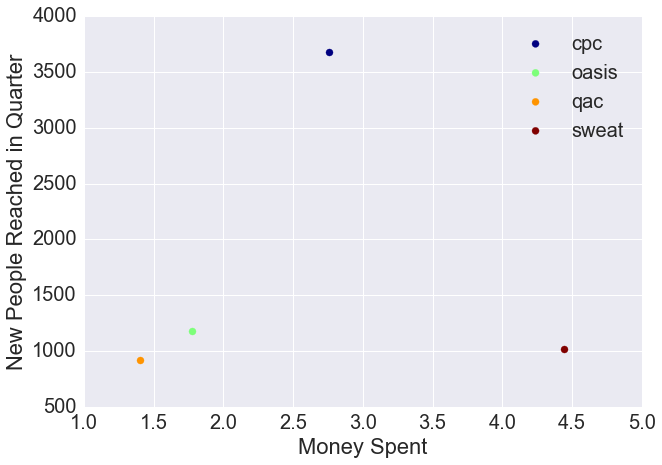

In [174]:
#setup colors
start,stop=0,1
number_of_colors= len(count_new_quarter.index.levels[1])
cm_subsection = linspace(start, stop, number_of_colors) 
colors = [ cm.jet(x) for x in cm_subsection ]

q=1

fig=figure()
fig.set_size_inches(10, 7)
sns.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
for SR,color in zip(count_new_quarter.index.levels[1],colors):
    try: 
        scatter(plot_spend[(q,SR)]/1e6,count_new_quarter[(q,SR)],color=color,label=SR,s=50)
    except KeyError:
        print('fail')
            
plt.legend()
plt.ylabel('New People Reached in Quarter')
plt.xlabel('Money Spent')

In [175]:
from IPython.html.widgets import *

/Users/attiladobi/anaconda2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [408]:
def plot_q(t):
    q=t
    fig=figure()
    fig.set_size_inches(10, 7)
    sns.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
    for SR,color in zip(count_new_quarter.index.levels[1],colors):
        try: 
            scatter(plot_spend[(q,SR)]/1e6,count_new_quarter[(q,SR)],color=color,label=SR,s=200)
        except KeyError:
            print('fail')

    legend=plt.legend(frameon=True )
    frame = legend.get_frame()
    frame.set_facecolor('white')

    plt.ylabel('New People Reached in Quarter')
    plt.xlabel('Money Spent ($ Million)')

fail


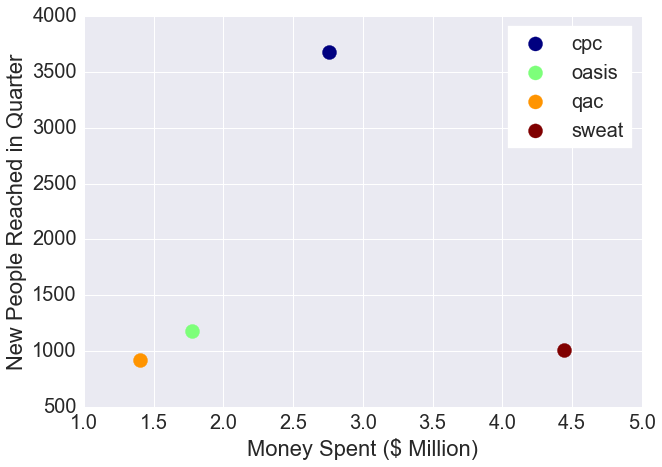

In [409]:
interact(plot_q, t=(1,2,1) )

<h1> Bar Chart for people reached normalized to money spent (also norm to target) </h1>

In [367]:
#After cutting the data is indexed as 1 and 2 on level 1
dat=count_new_quarter/plot_spend

In [368]:
dat

Quarter  subrecipient  
1        cpc               0.001332
         htt                    NaN
         lifeline nc            NaN
         ll durban              NaN
         ll fs                  NaN
         ll zululand            NaN
         munna ndi nnyi         NaN
         nqobile                NaN
         oasis             0.000662
         phru                   NaN
         psh                    NaN
         qac               0.000658
         sweat             0.000228
         thca                   NaN
         wrhi                   NaN
2        cpc               0.003509
         htt                    NaN
         lifeline nc            NaN
         ll durban              NaN
         ll fs                  NaN
         ll zululand            NaN
         munna ndi nnyi         NaN
         nqobile           0.004251
         oasis             0.006197
         phru                   NaN
         psh                    NaN
         qac               0.000883
    

In [527]:
#Loop through data and build arrays for q1, q2

names=[]
q1=[]
q2=[]
for SR in count_new_quarter.index.levels[1]:
    names.append(SR)
    q1.append(dat[(1,SR)])
    q2.append(dat[(2,SR)])
q1=np.array(q1)    
q2=np.array(q2)    

In [333]:
#new
q1=np.array(dat[1].values)
q2=np.array(dat[2].values)
names=dat[2].index
#this will lead to an error since the first quarter has one less SR reporting

In [528]:
names

[u'cpc', u'nqobile', u'oasis', u'qac', u'sweat']

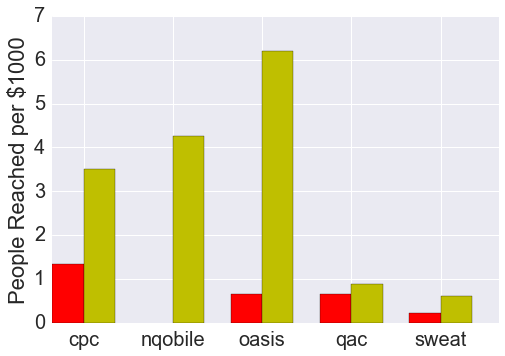

In [529]:
N = 5

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, q1*1000, width, color='r')

rects2 = ax.bar(ind + width, q2*1000, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('People Reached per $1000')
#ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width)
ax.set_xticklabels(names)

In [540]:
# Open File to write the D3 Graph
output_file = open('SA.html', 'w')

kwargs1 = {"fontSize": '100'}

chart = multiBarChart(width=800, height=400, x_axis_format=None, **kwargs1)
chart.create_y_axis('yAxis','People Reached per $1000')

xdata = names
#xdata = ['one' , 'two', 'three', 'four']
ydata1 = q1*1000
ydata2 = q2*1000

chart.add_serie(name="Quarter 1", y=ydata1, x=xdata ,**kwargs1)
chart.add_serie(name="Quarter 2", y=ydata2, x=xdata, **kwargs1)

chart.buildhtml()

output_file.write(chart.htmlcontent)

# close Html file
output_file.close()

In [ ]:
chart

<h1> Do the same for F1 indicator </h1>

In [532]:
condoms=DF.loc[(DF['field'].str.contains("f_1")) & (DF['year']==2016) & (DF['Quarter']>0) ]\
.groupby(['Quarter','subrecipient']).sum().val

In [533]:
condoms_per_spend=condoms/plot_spend

names=[]
q1=[]
q2=[]
for SR in condoms.index.levels[1]:
    names.append(SR)
    q1.append(condoms_per_spend[(1,SR)])
    q2.append(condoms_per_spend[(2,SR)])
q1=np.array(q1)    
q2=np.array(q2) 

In [546]:
condoms

Quarter  subrecipient
1        cpc             199411.0
         qac                 16.0
         sweat             4333.0
2        cpc             321120.0
         sweat             4591.0
3        sweat              900.0
Name: val, dtype: float64

In [547]:
# Open File to write the D3 Graph
output_file = open('SA_condoms.html', 'w')

kwargs1 = {"fontSize": '100'}

chart = multiBarChart(width=800, height=400, x_axis_format=None, **kwargs1)
chart.create_y_axis('yAxis','Condoms per $1000')

xdata = names
#xdata = ['one' , 'two', 'three', 'four']
ydata1 = q1*1000
ydata2 = q2*1000

chart.add_serie(name="Quarter 1", y=ydata1, x=xdata ,**kwargs1)
chart.add_serie(name="Quarter 2", y=ydata2, x=xdata, **kwargs1)

chart.buildhtml()

output_file.write(chart.htmlcontent)

# close Html file
output_file.close()


In [557]:
#chart

<h1> c1 indicator </h1>

In [555]:
std_screen=DF.loc[(DF['field'].str.contains("c1_sws_screened_for_sexually_transmitted_infections_sti_2")) & (DF['year']==2016) & (DF['Quarter']>0) ]\
.groupby(['Quarter','subrecipient']).sum().val
std_screen

Quarter  subrecipient
1        oasis             30.0
2        cpc             5631.0
         nqobile          109.0
         oasis           2208.0
         qac               22.0
Name: val, dtype: float64

In [556]:
std_screen_per_spend=std_screen/plot_spend

names=[]
q1=[]
q2=[]
for SR in std_screen.index.levels[1]:
    names.append(SR)
    q1.append(std_screen_per_spend[(1,SR)])
    q2.append(std_screen_per_spend[(2,SR)])
q1=np.array(q1)    
q2=np.array(q2) 

In [566]:
# Open File to write the D3 Graph
output_file = open('SA_std_screen.html', 'w')

kwargs1 = {"fontSize": '100'}

chart = multiBarChart(width=800, height=400, x_axis_format=None, **kwargs1)
chart.create_y_axis('yAxis','STI screen per $1000')

xdata = names
#xdata = ['one' , 'two', 'three', 'four']
ydata1 = q1*1000
ydata2 = q2*1000

chart.add_serie(name="Quarter 1", y=ydata1, x=xdata ,**kwargs1)
chart.add_serie(name="Quarter 2", y=ydata2, x=xdata, **kwargs1)

chart.buildhtml()

output_file.write(chart.htmlcontent)

# close Html file
output_file.close()

#chart

<h1> number_of_services_received_in_quarter </h1>

In [568]:
services=DF.loc[(DF['field'].str.contains("number_of_services_received_in_quarter")) & (DF['year']==2016) \
                & (DF['Quarter']>0) & (DF['Quarter']<=2)]\
.groupby(['Quarter','subrecipient']).sum().val

#services


services_per_spend=services/plot_spend

names=[]
q1=[]
q2=[]
for SR in services.index.levels[1]:
    names.append(SR)
    q1.append(services_per_spend[(1,SR)])
    q2.append(services_per_spend[(2,SR)])
q1=np.array(q1)    
q2=np.array(q2) 


# Open File to write the D3 Graph
output_file = open('SA_services.html', 'w')

kwargs1 = {"fontSize": '100'}

chart = multiBarChart(width=800, height=400, x_axis_format=None, **kwargs1)
chart.create_y_axis('yAxis','number of services per $1000')

xdata = names
#xdata = ['one' , 'two', 'three', 'four']
ydata1 = q1*1000
ydata2 = q2*1000

chart.add_serie(name="Quarter 1", y=ydata1, x=xdata ,**kwargs1)
chart.add_serie(name="Quarter 2", y=ydata2, x=xdata, **kwargs1)

chart.buildhtml()

output_file.write(chart.htmlcontent)

# close Html file
output_file.close()

chart